<a href="https://colab.research.google.com/github/NimishPrakash/Funding-Trends-in-Indian-Startups-/blob/main/Funding_Trends_in_Indian_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funding Trends in India
In this notebook, I analyzed the Indian startup funding landscape using a dataset containing information about various startups, their funding amounts, investors, and other relevant details.

The goal is to gain insights about funding trends, popular industries, top investors, best location and the distribution of funding amounts and many more to understand the funding ecosysem and startups in India.

# Data
The data is  taken from kaggle https://www.kaggle.com/datasets/sudalairajkumar/indian-startup-funding/data

The dataset contain information about more than 3000 startups.

## Dataset Overview
The attributes present in the dataset are:-

- SNo: Serial number
- Date: Date of funding
- StartupName: Name of the startup
- Vertical: Industry vertical
- Subvertical: Sub-category within the industry vertical
- City: City of the startup
- InvestorsName: Name of the investors
- InvestmentType: Type of investment (e.g., Seed Funding, Series A)
- AmountInUSD: Funding amount in USD
- Remark: Additional remarks

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
from google.colab import files
uploaded=files.upload()

Saving startup_funding.csv to startup_funding.csv


In [3]:
data=pd.read_csv("startup_funding.csv")

In [4]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
data.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [6]:
# changing the columns name
data.columns=['SNo','Date','StartupName','Vertical','Subvertical','City','InvestorsName','InvestmentType','AmountInUSD','Remark']

In [7]:
print('Size of data',data.shape)

Size of data (3044, 10)


# Data Cleaning, Visualization and Analysis


Clean the strings by removing unwanted characters.

In [8]:
def clean_string(x):
  return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0","")

for col in ['StartupName','Vertical','Subvertical','City','InvestorsName','InvestmentType','AmountInUSD','Remark']:
  data[col]=data[col].apply(lambda x: clean_string(x))

data.head()

,SNo,Date,StartupName,Vertical,Subvertical,City,InvestorsName,InvestmentType,AmountInUSD,Remark
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


Check the total number of missing values in the dataset.

In [9]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.count())*100
missing_value=pd.concat([total,percent],axis=1,keys=['Total','Percent %'])
missing_value

,Total,Percent %
SNo,0,0.0
Date,0,0.0
StartupName,0,0.0
Vertical,0,0.0
Subvertical,0,0.0
City,0,0.0
InvestorsName,0,0.0
InvestmentType,0,0.0
AmountInUSD,0,0.0
Remark,0,0.0


There is no missing values in the dataset.

In [10]:
data['Remark'].value_counts()

Remark
nan                                  2625
Series A                              177
Series B                               64
Pre-Series A                           37
Series C                               28
                                     ... 
pre Series-A                            1
QPrize Contest Winners                  1
pre series A                            1
pre-series A                            1
Strategic Funding, Minority stake       1
Name: count, Length: 70, dtype: int64

Remove the Remark column as it contain many nan values.

In [11]:
data=data.drop(['Remark'],axis=1)

In [12]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'Vertical', 'Subvertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

### Amount Distribution

Clean the AmountInUSD column and make it numerical to analyze the values.

In [13]:
def clean_amount(x):
  x=''.join([c for c in str(x) if c in ['0','1','2','3','4','5','6','7','8','9']])
  x=str(x).replace(',','').replace('+','')
  x=str(x).lower().replace('undisclosed','')
  x=str(x).lower().replace('n/a','')
  if x=='':
    x='-1'
  return x

data['AmountInUSD']=data['AmountInUSD'].apply(lambda x: float(clean_amount(x)))

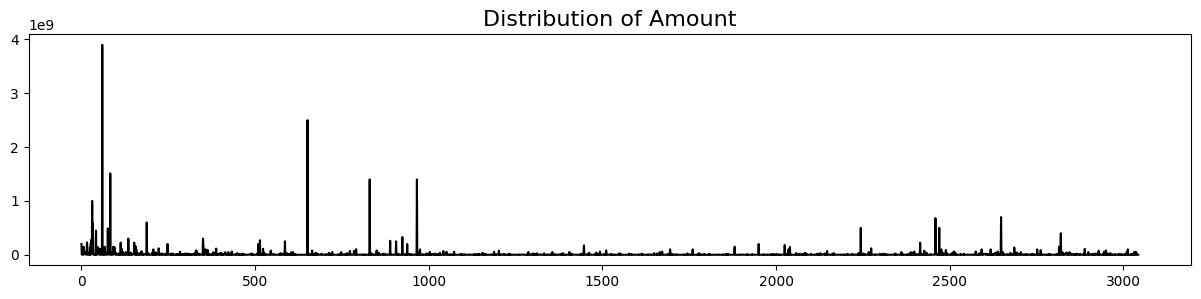

In [14]:
plt.figure(figsize=(15,3))
data['AmountInUSD'].plot(kind='line',color='black')
plt.title('Distribution of Amount',fontsize=16)
plt.show()

### Year-Month distribution or Funding with Time

Cleaning the Date column into proper format.

In [15]:
data['Date'][data['Date']=='12/05.2015']='12/05/2015'
data['Date'][data['Date']=='13/04.2015']='13/04/2015'
data['Date'][data['Date']=='15/01.2015']='15/01/2015'
data['Date'][data['Date']=='22/01//2015']='22/01/2015'
data['Date'][data['Date']=='05/072018']='05/07/2018'
data['Date'][data['Date']=='01/07/015']='01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015']='10/07/2015'

In [16]:
data['yearmonth']=(pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.month)

Number of Funding per month in Ascending Order(Top 10):
 yearmonth
201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: count, dtype: int64


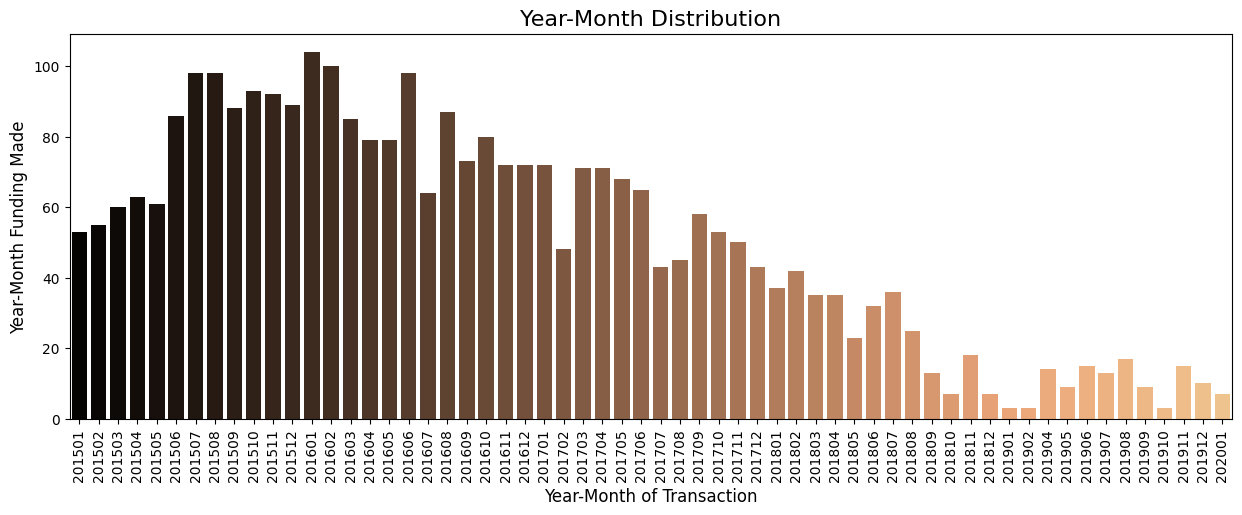

In [17]:
plt.figure(figsize=(15,5))
temp=data['yearmonth'].value_counts().sort_values(ascending=False).head(10)
print('Number of Funding per month in Ascending Order(Top 10):\n',temp)
year_month=data['yearmonth'].value_counts()

sns.barplot(x=year_month.index,y=year_month.values,palette='copper')
plt.xticks(rotation=90)
plt.xlabel('Year-Month of Transaction',fontsize=12)
plt.ylabel('Year-Month Funding Made',fontsize=12)
plt.title('Year-Month Distribution',fontsize=16)
plt.show()

>>The month of January, February and June in 2016 has the highest number of fundings.

Maximum funding to a Startup

In [18]:
data['AmountInUSD'].dropna().sort_values().max()    #dropna() remove the rows contains null value

3900000000.0

TOP 10 Startups with maximum funding

In [19]:
print('TOP 10 Startups with Maximum Fundings:')
print(data[['AmountInUSD','StartupName']].sort_values(by='AmountInUSD',ascending=False).head(10))

TOP 10 Startups with Maximum Fundings:
       AmountInUSD       StartupName
60    3.900000e+09  Rapido Bike Taxi
651   2.500000e+09          Flipkart
83    1.510950e+09         Pratilipi
830   1.400000e+09             Paytm
966   1.400000e+09          Flipkart
31    1.000000e+09             Paytm
2648  7.000000e+08      Flipkart.com
2459  6.800000e+08             Paytm
188   6.000000e+08        True North
33    5.850000e+08             Udaan


### Using interactive python to visualize the amount of funding

In [20]:
@interact
def check(column='AmountInUSD',x=500000000):   # 50 crore funding startups
  return data[data[column]>x].sort_values(by='AmountInUSD',ascending= False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [21]:
data[data['StartupName']=='Swiggy']   # fundings of startup

,SNo,Date,StartupName,Vertical,Subvertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
357,358,07/02/2018,Swiggy,Food and Beverages,Online Food Delivery,Bengaluru,Naspers,Private Equity,100000000.0,201802
850,851,30/05/2017,Swiggy,Consumer Internet,Online food delivery platform,Bangalore,"Nasper, Accel India, SAIF Partners, Bessemer V...",Private Equity,80000000.0,201705
1380,1381,19/09/2016,Swiggy,Consumer Internet,Online Food Ordering & Delivery,Bangalore,Bessemer Venture Partners,Private Equity,15000000.0,201609
1692,1693,10/05/2016,Swiggy,Consumer Internet,Food Delivery Platform,Bangalore,"Norwest Venture Partners, DST Global, Accel Pa...",Private Equity,7000000.0,201605
2058,2059,19/01/2016,Swiggy,Consumer Internet,Online/Mobile food ordering platform,Bangalore,"Harmony Partners, RB Investments & existing in...",Private Equity,35000000.0,201601
2696,2697,09/06/2015,Swiggy,Online Food Ordering,nan,Bangalore,"Norwest Venture Partners, SAIF Partners, Accel...",Private Equity,16500000.0,201506
2763,2764,06/05/2015,Swiggy,Online Food Delivery,nan,Bangalore,Norwest Venture Partners,Private Equity,15000000.0,201505
2810,2811,03/04/2015,Swiggy,Online Food Delivery,nan,Bangalore,"Accel Partners, SAIF Partners",Private Equity,2000000.0,201504


In [22]:
print('Minimum funding to a Start-up is',data['AmountInUSD'].dropna().sort_values().min())

Minimum funding to a Start-up is -1.0


>> There are some startups with zero funding.

In [23]:
#These are startups with Zero Funding
print('Start-up with Zero Funding(TOP 10):\n',data[['AmountInUSD','StartupName']].sort_values(by='AmountInUSD',ascending= True).head(10))

Start-up with Zero Funding(TOP 10):
       AmountInUSD                      StartupName
2125         -1.0                        Splitkart
1464         -1.0                     TAC Security
708          -1.0                      FableStreet
709          -1.0                  Monsoon Fintech
710          -1.0                        MonkeyBox
1463         -1.0                       Fitternity
2166         -1.0                          STAGE 3
713          -1.0  Creator\\xe2\\x80\\x99s Gurukul
2465         -1.0                       LoanCircle
1461         -1.0                          Zzungry


In [24]:
no_funding=data[data['AmountInUSD']==-1].shape
print('There are',no_funding[0],'start-up with NO funding')

There are 971 start-up with NO funding


Average funding of Indian Startups

In [25]:
print('Indian startups got average funding of {:.2f}'.format(data['AmountInUSD'].dropna().mean()))

Indian startups got average funding of 13270376.61


### Number of fundings for startups

Total no of time Start-up funded: 2457
StartupName
Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
NoBroker     6
Medinfi      6
Nykaa        6
Meesho       6
Jugnoo       5
Grofers      5
Name: count, dtype: int64


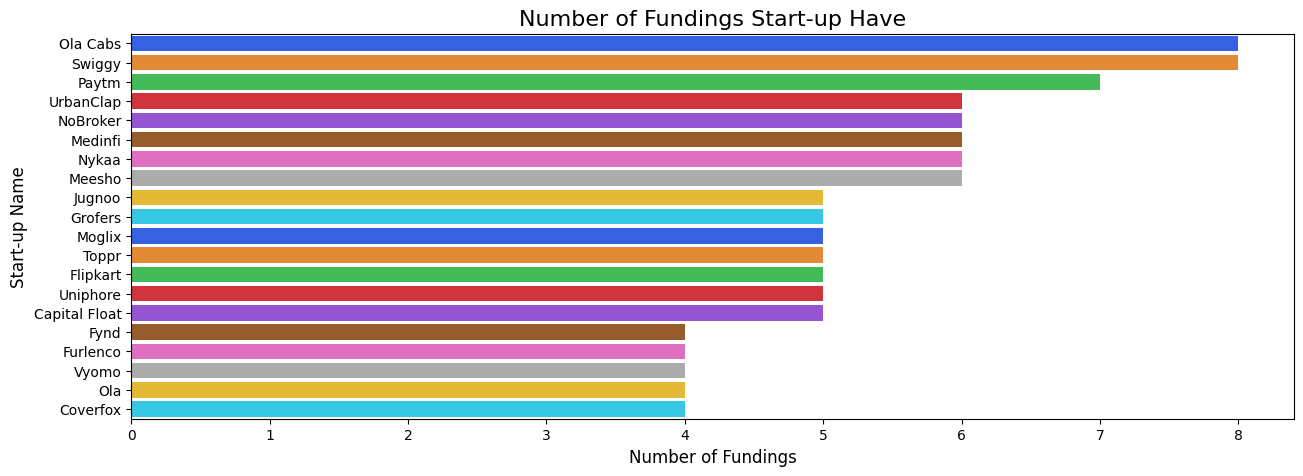

In [26]:
print('Total no of time Start-up funded:',len(data['StartupName'].unique()))
print(data['StartupName'].value_counts().head(10))
startupname=data['StartupName'].value_counts().head(20)

plt.figure(figsize=(15,5))
sns.barplot(y=startupname.index,x=startupname.values,alpha=0.9,palette='bright')
plt.ylabel('Start-up Name',fontsize=12)
plt.xlabel('Number of Fundings',fontsize=12)
plt.title('Number of Fundings Start-up Have',fontsize=16)
plt.show()

>> Ola Cabs and Swiggy have been funded 8 times while Paytm has been funded 7 times.

### Industry vertical of startups

In [27]:
data['Vertical'].value_counts().head(20)

Vertical
Consumer Internet    941
Technology           478
eCommerce            186
nan                  171
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Ed-Tech               14
E-commerce            12
FinTech                9
Ecommerce              8
IT                     8
Real Estate            6
Fin-Tech               6
Food and Beverage      6
Others                 6
Name: count, dtype: int64

Replace the `nan` value of Industry Vertical with `New Vertical`

In [28]:
data['Vertical']=data['Vertical'].replace('nan','New Vertical')
Industry=data['Vertical'].value_counts().head(10)
print(Industry)

Vertical
Consumer Internet    941
Technology           478
eCommerce            186
New Vertical         171
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Name: count, dtype: int64


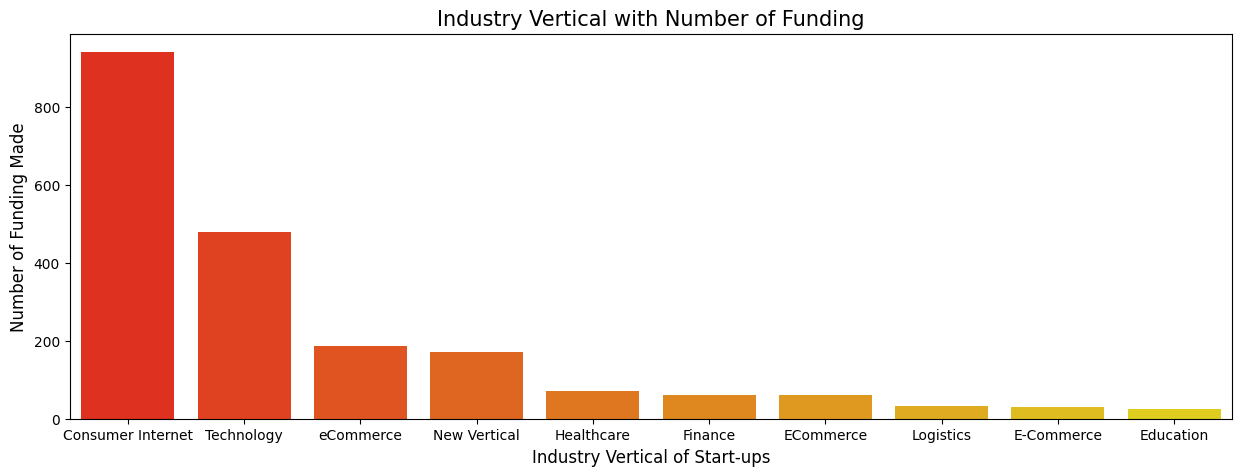

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x=Industry.index,y=Industry.values,palette='autumn')
plt.xlabel('Industry Vertical of Start-ups',fontsize=12)
plt.ylabel('Number of Funding Made',fontsize=12)
plt.title('Industry Vertical with Number of Funding',fontsize=15)
plt.show()

>> Most of the startups are of Consumer Internet industry, then comes the Technology industry.

### Industry Sub-vertical of startups

In [30]:
data['Subvertical'].value_counts().head(20)

Subvertical
nan                                              936
Online Lending Platform                           11
Online Pharmacy                                   10
Food Delivery Platform                             8
Online Learning Platform                           5
Online Education Platform                          5
Online Lending                                     5
Online lending platform                            5
Education                                          5
Online Food Delivery                               4
Non-Banking Financial Company                      4
Online Gifting platform                            3
B2B Marketplace                                    3
Online learning platform                           3
Online platform for Higher Education Services      3
Online Payment Gateway                             3
Online Furniture Store                             3
Online Insurance Aggregator                        3
Online Insurance Platform         

Subvertical
Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online Learning Platform                          5
Online Education Platform                         5
Online Lending                                    5
Online lending platform                           5
Education                                         5
Online Food Delivery                              4
Non-Banking Financial Company                     4
Online Gifting platform                           3
B2B Marketplace                                   3
Online learning platform                          3
Online platform for Higher Education Services     3
Online Payment Gateway                            3
Online Furniture Store                            3
Online Insurance Aggregator                       3
Online Insurance Platform                         3
Agri-tech                                         3


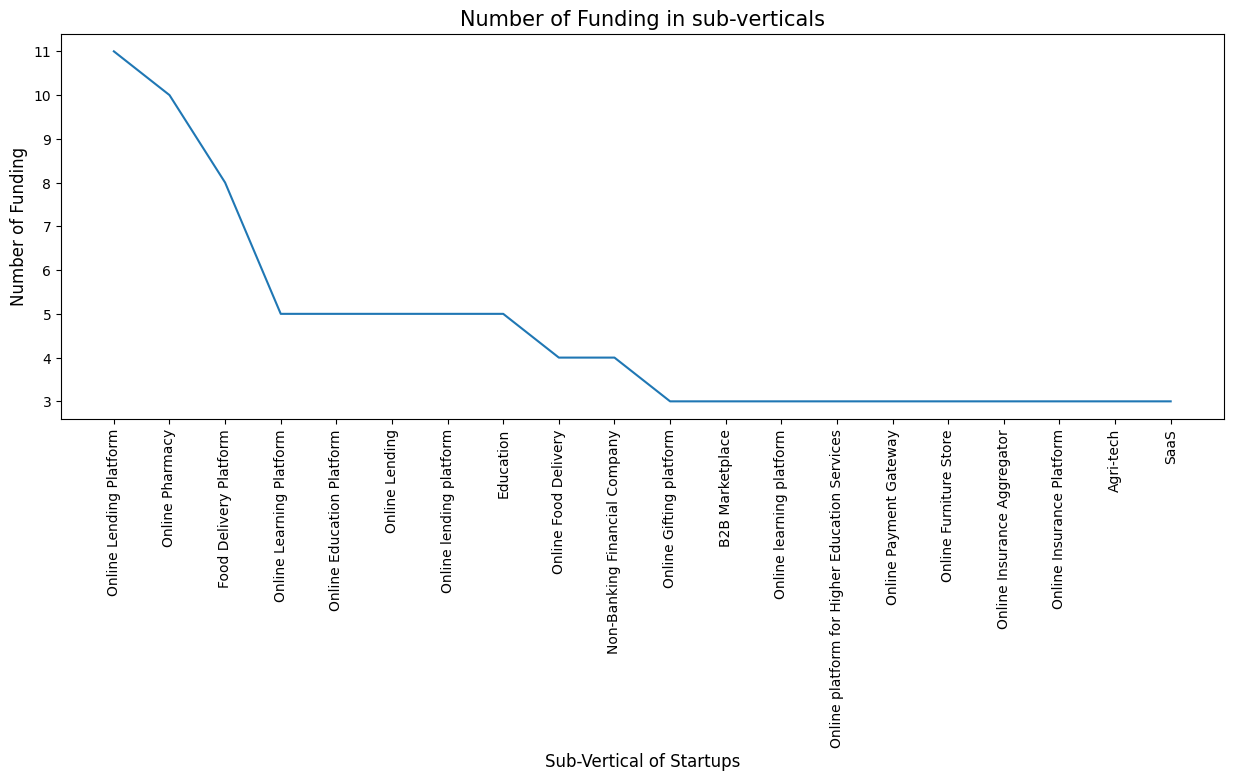

In [31]:
industry=data['Subvertical'].value_counts()[1:].head(20)
print(industry)

plt.figure(figsize=(15,5))
sns.lineplot(x=industry.index,y=industry.values)
plt.xticks(rotation='vertical')
plt.xlabel('Sub-Vertical of Startups',fontsize=12)
plt.ylabel('Number of Funding',fontsize=12)
plt.title('Number of Funding in sub-verticals',fontsize=15)
plt.show()

>> Online Learning Platform and Online Pharmacy got the most fundings.

### Top Cities with Fundings

In [32]:
data['City'].value_counts().head(20)

City
Bangalore     701
Mumbai        568
New Delhi     424
Gurgaon       291
nan           180
Bengaluru     141
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Delhi          34
Jaipur         30
Kolkata        21
Indore         13
Chandigarh     11
Vadodara       10
Goa            10
Singapore       8
Name: count, dtype: int64

TOP 10 city which are funded
City
Bengaluru    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: count, dtype: int64


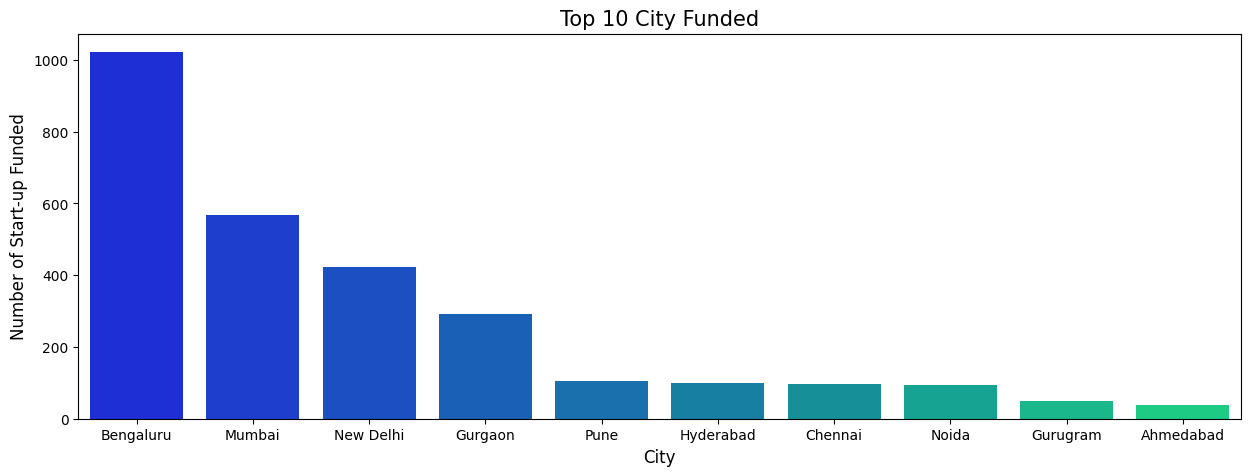

In [33]:
data['City']=data['City'].replace(('Bangalore','nan'),('Bengaluru','Bengaluru'))
city=data['City'].value_counts().head(10)
print('TOP 10 city which are funded')
print(city)

plt.figure(figsize=(15,5))
sns.barplot(x=city.index,y=city.values,palette='winter')
plt.xlabel('City',fontsize=12)
plt.ylabel('Number of Start-up Funded',fontsize=12)
plt.title('Top 10 City Funded',fontsize=15)
plt.show()

>> Bengaluru got the highest number of fundings.

### Word cloud visualisation for Top Investors

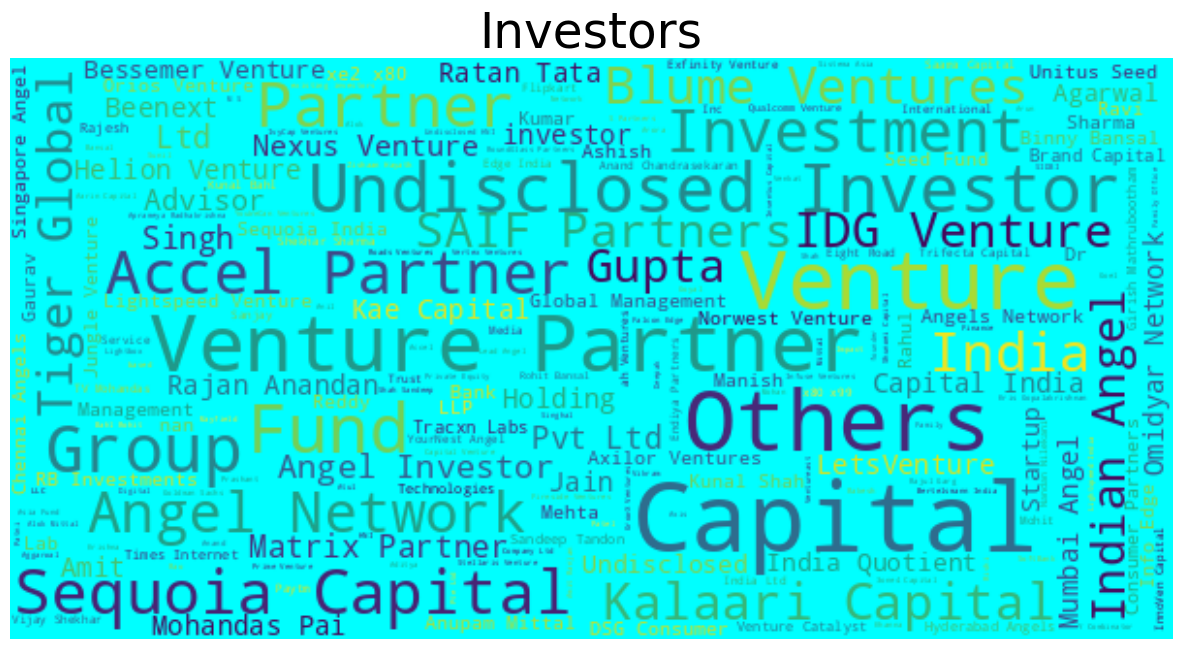

In [34]:
names=data['InvestorsName'][~pd.isnull(data['InvestorsName'])]
wordcloud=WordCloud(max_font_size=50,width=600,height=300,background_color='cyan').generate(' '.join(names))

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Investors',fontsize=35)
plt.axis('off')
plt.show()

### Number of Fundings by Top Investors

In [35]:
data['InvestorsName'].value_counts().head(20)

InvestorsName
Undisclosed Investors       39
Undisclosed investors       30
Ratan Tata                  25
Indian Angel Network        24
nan                         24
Kalaari Capital             16
Sequoia Capital             15
Group of Angel Investors    15
Accel Partners              12
Undisclosed Investor        12
Venture Catalysts           11
undisclosed investors       11
Undisclosed                 11
Brand Capital               11
SAIF Partners               10
RoundGlass Partners         10
Info Edge (India) Ltd        9
Undisclosed investor         9
Tiger Global                 9
Nexus Venture Partners       9
Name: count, dtype: int64

InvestorsName
Undisclosed Investors       101
Undisclosed Investor         35
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
Name: count, dtype: int64


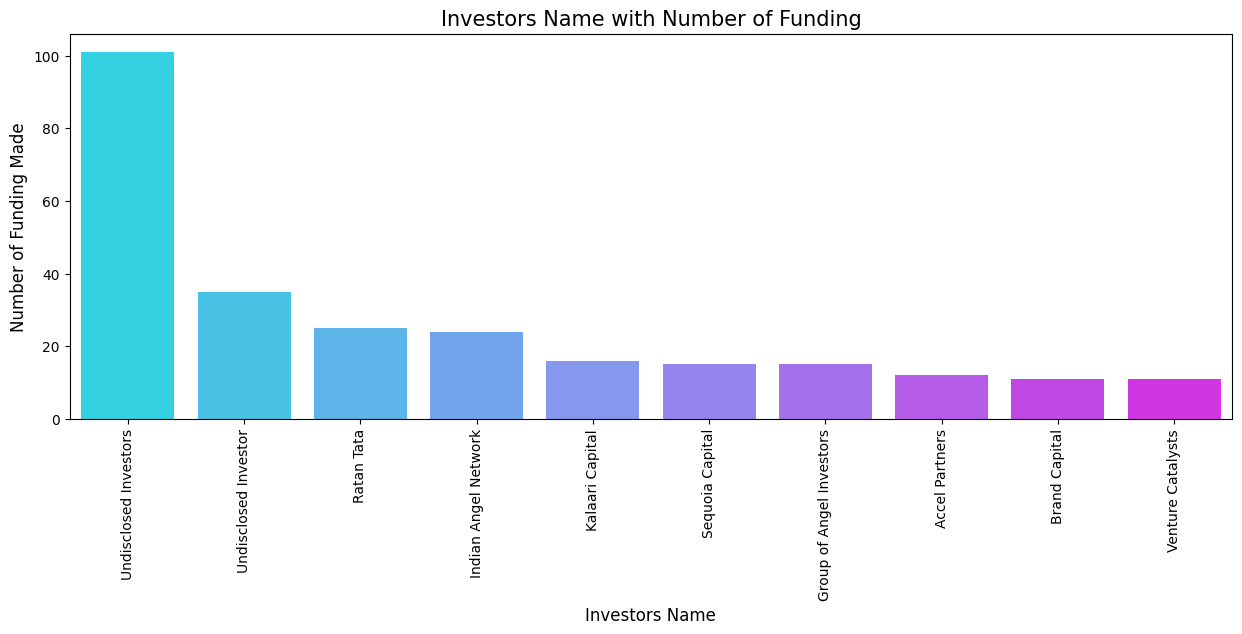

In [36]:
data['InvestorsName'][data['InvestorsName']=='Undisclosed investors']='Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='undisclosed Investors']='Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='undisclosed investors']='Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed investor']='Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed Investor']='Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed']='Undisclosed Investor'
data['InvestorsName'][data['InvestorsName']=='nan']='Undisclosed Investor'

investors=data['InvestorsName'].value_counts().head(10)
print(investors)

plt.figure(figsize=(15,5))
sns.barplot(x=investors.index,y=investors.values,palette='cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Name',fontsize=12)
plt.ylabel('Number of Funding Made',fontsize=12)
plt.title('Investors Name with Number of Funding',fontsize=15)
plt.show()

>> Most of the major investors don't disclose their identity.

>> Ratan Tata, Indian Angel Network, Kalaari Capital are some of the major investors in Indian startups.

### Investment types for startups

In [37]:
data['InvestmentType'].value_counts().head(20)

InvestmentType
Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Series D                  12
Angel / Seed Funding       8
Seed Round                 7
nan                        4
Pre-Series A               4
Private Equity Round       4
Seed                       4
Seed / Angle Funding       3
pre-Series A               2
Venture Round              2
Name: count, dtype: int64

Cleaning the Investment Column

In [38]:
data['InvestmentType'][data['InvestmentType']=='Seed\\nFunding']='Seed Funding'
data['InvestmentType'][data['InvestmentType']=='Seed/ Angel Funding']='Seed Angel Funding'
data['InvestmentType'][data['InvestmentType']=='Seed / Angel Funding']='Seed Angel Funding'
data['InvestmentType'][data['InvestmentType']=='Seed/Angel Funding']='Seed Angel Funding'
data['InvestmentType'][data['InvestmentType']=='Angel / Seed Funding']='Seed Angel Funding'
data['InvestmentType'][data['InvestmentType']=='Seed / Angle Funding']='Seed Angel Funding'

In [39]:
data['InvestmentType'].value_counts().head(20)

InvestmentType
Private Equity          1356
Seed Funding            1355
Seed Angel Funding       141
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Series B                  20
Series C                  14
Series D                  12
Seed Round                 7
Pre-Series A               4
nan                        4
Private Equity Round       4
Seed                       4
Series F                   2
Venture Round              2
Equity                     2
pre-Series A               2
Corporate Round            2
Series E                   2
Name: count, dtype: int64

InvestmentType
Private Equity        1356
Seed Funding          1355
Seed Angel Funding     141
Seed\\nFunding          30
Debt Funding            25
Series A                24
Series B                20
Series C                14
Series D                12
Seed Round               7
Name: count, dtype: int64


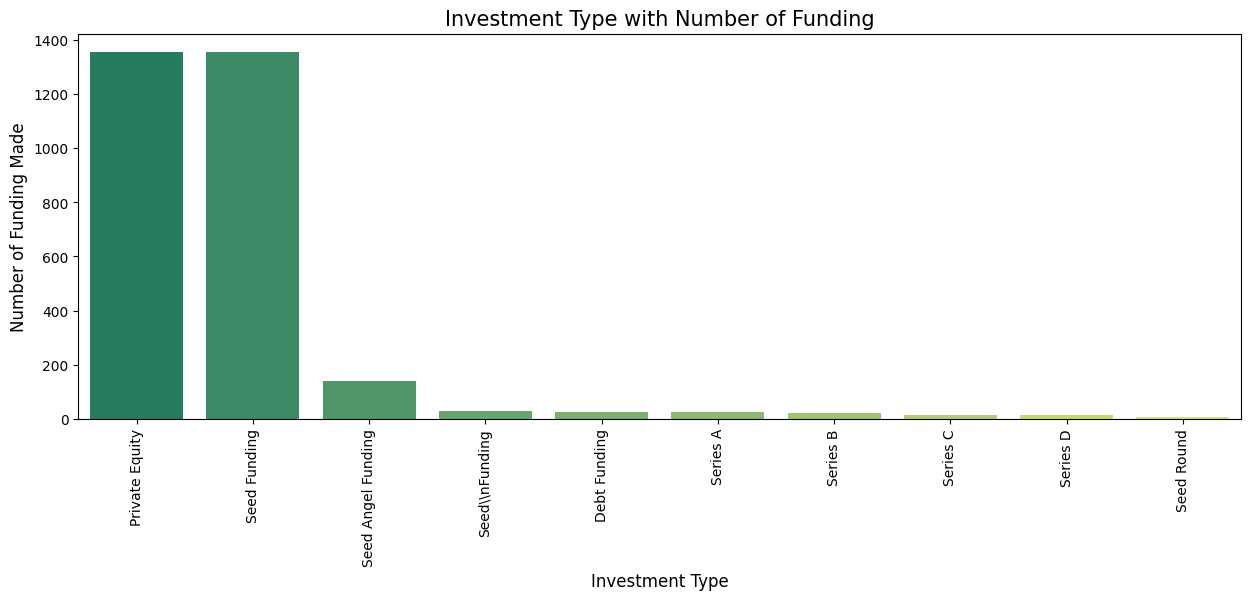

In [40]:
investment=data['InvestmentType'].value_counts().head(10)
print(investment)

plt.figure(figsize=(15,5))
sns.barplot(x=investment.index,y=investment.values,palette='summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type',fontsize=12)
plt.ylabel('Number of Funding Made',fontsize=12)
plt.title('Investment Type with Number of Funding',fontsize=15)
plt.show()

>> Private Equity and Seed Funding are the most common type of investment for Startups.

>> Private Equity is a investment class that consists of capital that is not listed on public exchange or are not publically traded.

>> Seed Funding is the form of securities offering in which an investor invest capital in the startups in exchange for equity or stake in initial stage